In [2]:
import GACC
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
ns = np.arange(start = 1, stop = 16) ** 2 * 128

cudaf8 = []
cudaf4 = []
ompf4 = []
ompf8 = []

for n in tqdm(ns):

    df = GACC.util.Distributions.Plummer(n)

    outdf,stats = GACC.cuda.evaluate(df,precision="f8")
    cudaf8.append(stats["total_eval_time"])

    outdf,stats = GACC.cuda.evaluate(df,precision="f4")
    cudaf4.append(stats["total_eval_time"])

    outdf,stats = GACC.omp.evaluate(df,precision="f8")
    ompf8.append(stats["total_eval_time"])

    outdf,stats = GACC.omp.evaluate(df,precision="f4")
    ompf4.append(stats["total_eval_time"])

In [12]:
def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

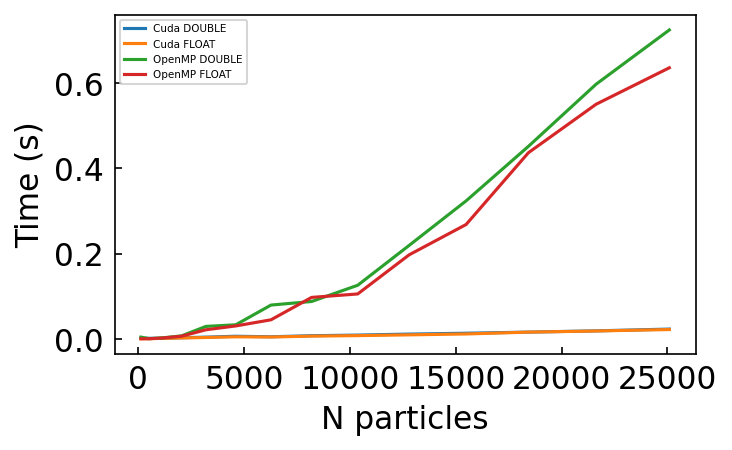

In [13]:
plt.plot(ns,cudaf8,label="Cuda DOUBLE")
plt.plot(ns,cudaf4,label="Cuda FLOAT")
plt.plot(ns,ompf8, label="OpenMP DOUBLE")
plt.plot(ns,ompf4, label="OpenMP FLOAT")
plt.legend()
plt.ylabel("Time (s)")
plt.xlabel("N particles")
plt.show()